In [1]:
#Search for specific terms within a corpus of texts
#texts used are txt files of pubmed "Disorders of Consciousness" studies
#2239 documents considered relevant after TM (references already removed)
#Outputs: bar graph of all dictionary terms + BoW of corpus
#Outputs: term document matrix as a csv in downloads

In [2]:
import functions

In [3]:
dict_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/CombinedDict.txt"
corpus_dir = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/TM_abstracts"
replacement_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/CombinedDict.csv"

In [4]:
#define the lists we'll need for outputs

dictionary = []

combined = [] #For pathway 2 - total dictionary list

docs = []

In [5]:
doc_list = functions.os_level.get_corpus(corpus_dir, "txt")

In [6]:
print("We have a total of {} articles".format(len(doc_list)))

We have a total of 2440 articles


In [7]:
dictionary = functions.os_level.makedict(dict_path)

In [8]:
def action(i, doc_list, dictionary):
    
    text = maketxt("{}".format(corpus_dir) + "/{}".format(doc_list[i]), replacement_path)
        
    #remove non-dictionary words
    text = rem_dict(dictionary,text) 
        
    #add to Total List for Combined BoW later
    combined.extend(text) 
        
    #check corpus doc again
        
    #add to list of text strings for tdm
    doc_for_tdm = " ".join(text)
    docs.append(doc_for_tdm)
    
    
    
#Create list of words appearing in txt file 
def maketxt(text, csv_path):
    string = ''
    with open(text) as file:
        string = file.read()
        return functions.processing.preprocess(string, csv_path)
    
#Remove words not in the dictionary NOTE: Will find words within words ie. bar within bars
def rem_dict(dictionary, doc):
    new_doc = []
    for i in range(len(doc)):
        for j in range(len(dictionary)):
            if dictionary[j] in doc[i]:
                new_doc.append(dictionary[j])
    return new_doc

In [9]:
for i in range(len(doc_list)):
            action(i, doc_list, dictionary)

In [10]:
save_location = "/Users/manojarachige/Downloads/"

import pandas as pd

def display(combined, csv_path):
    df = pd.read_csv(csv_path)
    for i in range(len(df)): #python replace items in a loop
        for j in range(len(combined)):
            if df["Replacement"][i] == combined[j]:
                combined[j] = df["Display"][i]
    return combined

In [11]:
#output 1
df = functions.outputs.tdm_make(docs)
df.to_csv(r'{}TDM.csv'.format(save_location))

Total>>> [('thalamus', 244), ('cingulate cortex', 119), ('amygdala', 69), ('anterior cingulate cortex', 67), ('cuneus', 64), ('precuneus', 60), ('hippocampus', 53), ('cerebellum', 50), ('posterior cingulate gyrus', 37), ('dorsolateral prefrontal cortex', 35), ('premotor cortex', 24), ('cerebellar crus', 24), ('orbital inferior frontal gyrus', 23), ('ventral tegmental area', 22), ('caudate nucleus', 20), ('orbitofrontal area', 19), ('primary motor cortex', 16), ('auditory cortex', 16), ('insular cortex', 15), ('substantia nigra', 11), ('superior frontal gyrus', 11), ('fusiform gyrus', 10), ('superior temporal gyrus', 10), ('angular gyrus', 10), ('supplementary motor cortex', 9), ('inferior parietal gyrus', 9), ('lenticular nucleus', 9), ('supramarginal gyrus', 9), ('primary visual cortex', 8), ('retrosplenial cortex', 8), ('middle frontal gyrus', 8), ('intralaminar thalamus', 6), ('lenticular nucleus pallidum', 6), ('superior parietal lobule', 5), ('locus coeruleus', 5), ('anterior cing

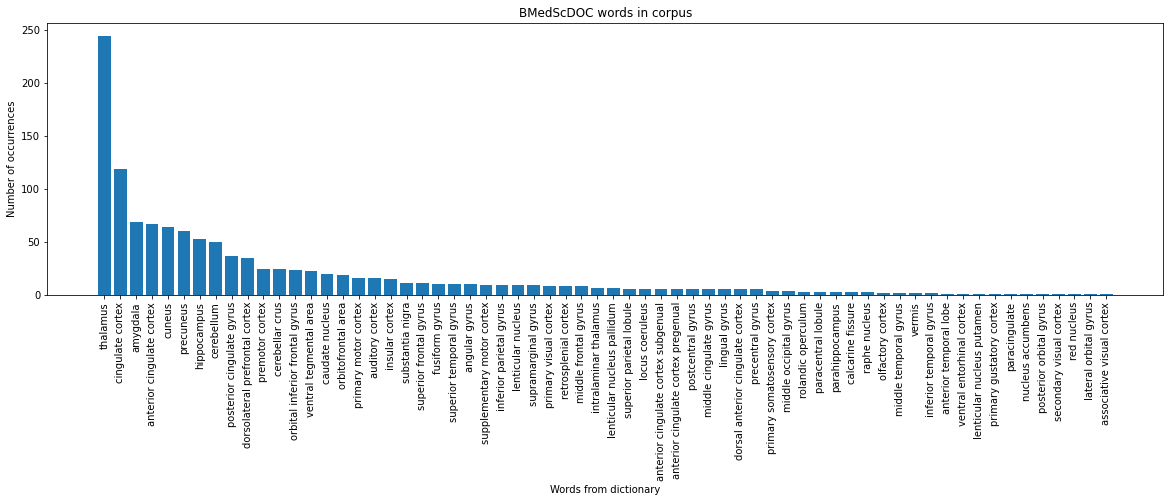

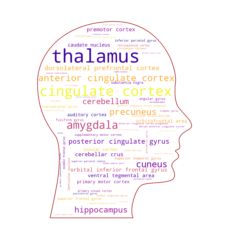

In [12]:
for_display = display(combined, replacement_path)

#output 2
functions.outputs.barchart(for_display, save_location)

#output 3
functions.outputs.wc(for_display)

In [13]:
total = [('thalamus', 244), ('cingulate cortex', 119), ('amygdala', 69), ('anterior cingulate cortex', 67), ('cuneus', 64), ('precuneus', 60), ('hippocampus', 53), ('cerebellum', 50), ('posterior cingulate gyrus', 37), ('dorsolateral prefrontal cortex', 35), ('premotor cortex', 24), ('cerebellar crus', 24), ('orbital inferior frontal gyrus', 23), ('ventral tegmental area', 22), ('caudate nucleus', 20), ('orbitofrontal area', 19), ('primary motor cortex', 16), ('auditory cortex', 16), ('insular cortex', 15), ('substantia nigra', 11), ('superior frontal gyrus', 11), ('fusiform gyrus', 10), ('superior temporal gyrus', 10), ('angular gyrus', 10), ('supplementary motor cortex', 9), ('inferior parietal gyrus', 9), ('lenticular nucleus', 9), ('supramarginal gyrus', 9), ('primary visual cortex', 8), ('retrosplenial cortex', 8), ('middle frontal gyrus', 8), ('intralaminar thalamus', 6), ('lenticular nucleus pallidum', 6), ('superior parietal lobule', 5), ('locus coeruleus', 5), ('anterior cingulate cortex subgenual', 5), ('anterior cingulate cortex pregenual', 5), ('postcentral gyrus', 5), ('middle cingulate gyrus', 5), ('lingual gyrus', 5), ('dorsal anterior cingulate cortex', 5), ('precentral gyrus', 5), ('primary somatosensory cortex', 4), ('middle occipital gyrus', 4), ('rolandic operculum', 3), ('paracentral lobule', 3), ('parahippocampus', 3), ('calcarine fissure', 3), ('raphe nucleus', 3), ('olfactory cortex', 2), ('middle temporal gyrus', 2), ('vermis', 2), ('inferior temporal gyrus', 2), ('anterior temporal lobe', 1), ('ventral entorhinal cortex', 1), ('lenticular nucleus putamen', 1), ('primary gustatory cortex', 1), ('paracingulate', 1), ('nucleus accumbens', 1), ('posterior orbital gyrus', 1), ('secondary visual cortex', 1), ('red nucleus', 1), ('lateral orbital gyrus', 1), ('associative visual cortex', 1)]

In [14]:
len(total)

64

In [15]:
total

[('thalamus', 244),
 ('cingulate cortex', 119),
 ('amygdala', 69),
 ('anterior cingulate cortex', 67),
 ('cuneus', 64),
 ('precuneus', 60),
 ('hippocampus', 53),
 ('cerebellum', 50),
 ('posterior cingulate gyrus', 37),
 ('dorsolateral prefrontal cortex', 35),
 ('premotor cortex', 24),
 ('cerebellar crus', 24),
 ('orbital inferior frontal gyrus', 23),
 ('ventral tegmental area', 22),
 ('caudate nucleus', 20),
 ('orbitofrontal area', 19),
 ('primary motor cortex', 16),
 ('auditory cortex', 16),
 ('insular cortex', 15),
 ('substantia nigra', 11),
 ('superior frontal gyrus', 11),
 ('fusiform gyrus', 10),
 ('superior temporal gyrus', 10),
 ('angular gyrus', 10),
 ('supplementary motor cortex', 9),
 ('inferior parietal gyrus', 9),
 ('lenticular nucleus', 9),
 ('supramarginal gyrus', 9),
 ('primary visual cortex', 8),
 ('retrosplenial cortex', 8),
 ('middle frontal gyrus', 8),
 ('intralaminar thalamus', 6),
 ('lenticular nucleus pallidum', 6),
 ('superior parietal lobule', 5),
 ('locus coerul